In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Data Overview

In [2]:
# read data
df = pd.read_csv('bank_customer_survey.csv')

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


In [4]:
# Number of rows and columns: 45211 rows and 17 variables
df.shape

(45211, 17)

In [5]:
# Data Type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


In [6]:
# Give each independent variables a more explicit name
df = df.rename(columns={"housing": "housing_loan", "loan": "personal_loan", "contact": "contact_type", 
                   "day": "last_contact_day", "month": "last_contact_month", "duration": "last_contact_duration",
                   "campaign": "current_campaign_contacts", "previous": "previous_campaign_contacts"}).copy()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   age                         45211 non-null  int64 
 1   job                         45211 non-null  object
 2   marital                     45211 non-null  object
 3   education                   45211 non-null  object
 4   default                     45211 non-null  object
 5   balance                     45211 non-null  int64 
 6   housing_loan                45211 non-null  object
 7   personal_loan               45211 non-null  object
 8   contact_type                45211 non-null  object
 9   last_contact_day            45211 non-null  int64 
 10  last_contact_month          45211 non-null  object
 11  last_contact_duration       45211 non-null  int64 
 12  current_campaign_contacts   45211 non-null  int64 
 13  pdays                       45211 non-null  in

In [8]:
# Classify independent variables into categorical(qualitative) and numerical(quantitative)
# Numerical
numerical = ['age', 'balance', 'last_contact_day', 'last_contact_duration','current_campaign_contacts', 'pdays', 'previous_campaign_contacts']
# Categorical
categorical = ['job', 'marital', 'education', 'default', 'housing_loan', 'personal_loan', 'contact_type', 'last_contact_month', 'poutcome']

In [9]:
# target variable distribution
df['y'].value_counts(normalize = True)

y
0    0.883015
1    0.116985
Name: proportion, dtype: float64

The dataset consists of 17 variables, including one dependent variable (binary), which represents the campaign outcome, and 16 independent explanatory variables. In total, there are 45,211 rows.

Notably, the target variable is highly imbalanced, which should be taken into account during exploration, analysis, and modeling.

Additionally, some numerical variables might be better analyzed as categorical variables. For example, **age**: whether a client subscribes to a term deposit product is generally related to their age group. It is not necessarily true that older people are more likely to subscribe, or younger people are less likely. Instead, subscription probability may depend on the specific characteristics of an age group (e.g., individuals aged 30–40 might have a higher likelihood of subscribing because they are in their prime earning years). Similarly, **last_contact_day**: the probability of subscription is unlikely to show a linear trend based on the day of the month but might vary depending on specific days (e.g., days following payday).

---

# 2. EDA

##  2.1 Categorical Variable Analysis

#### Categorical - Univeriate Analysis

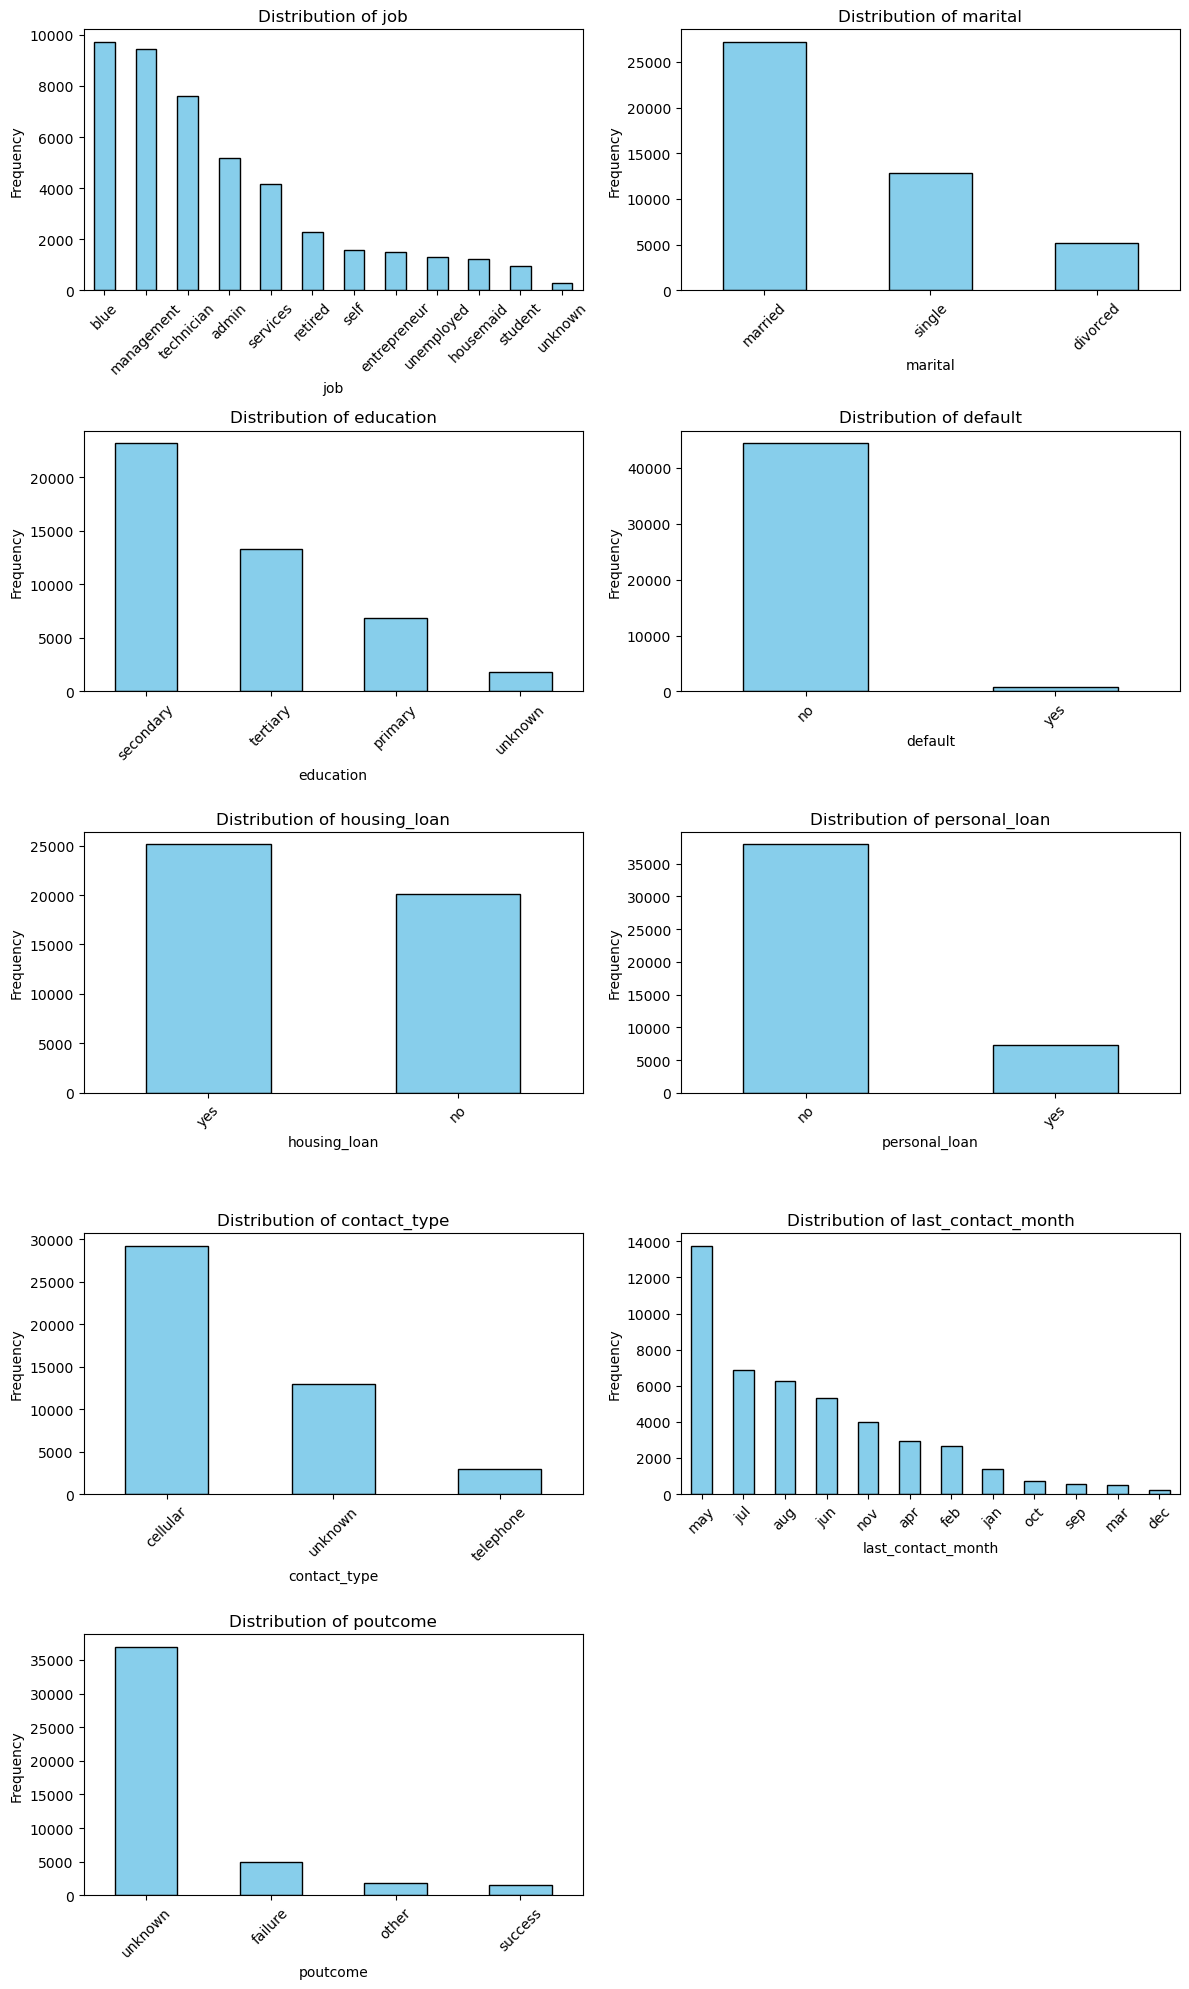

In [10]:
# Distribution of categorical variables
ncols = 2
nrows = (len(categorical) + ncols - 1) // ncols 
plt.figure(figsize=(12, nrows * 4))

for i, col in enumerate(categorical, 1):
    plt.subplot(nrows, ncols, i)  
    df[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')  
    plt.xlabel(col) 
    plt.ylabel('Frequency')  
    plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

#### Insights:
1. Job (contains 'Unknown' values): The dataset is dominated by "blue," "management," and "technician".

Income Categories:
- High income: management, entrepreneur
- Moderate income: technician, admin, services
- Low income: blue, retired, unemployed, housemaid, student
- Obscure: self, unknown

2. Marital Status: Most clients in this campaign are married.

3. Education (contains 'Unknown'): Secondary school education has the highest frequency, followed by tertiary education (higher or post-secondary education). This distribution aligns with the distribution of job categories, suggesting a potential correlation between education and occupation.


4. Default: The 'Default' variable is highly imbalanced, with a majority of clients having 'no' credit defaults and only a small proportion having 'yes.' In an explanatory model, this variable is unlikely to be significant. While 'default = yes' is strongly correlated with term deposit subscription, its impact should be interpreted cautiously due to the small number of 'yes', which may not provide sufficient evidence for robust conclusion.
5. Housing Loan: relatively balanced.
6. Personal Loan: imbalanced, with "no" being the majority.
7. Contact Type (contains 'Unknown'):The "unknown" values might indicate other types of contact, or simply missing information.
8. Last contact month: Concentrate in May, June, July, Augest.
9. Poutcome(contains 'Unknown'):A large proportion of clients were not previously contacted, leading to many unknown values in the 'poutcome'. Expect a relationship between poutcome and the target variable (y). Further exploration is needed to clarify what 'other' means here and its potential impact on current campaign subscription behavior.

#### Categorical Variables & term deposit subscription (y)

In [11]:
# The function that adds percentage label on stacked bar plot
def add_percentage_labels(ax, crosstab):
    for idx, category in enumerate(crosstab.index):
        for proportion, cumulative in zip(crosstab.loc[category], crosstab.loc[category].cumsum()):
            ax.text(
                x=idx,
                y=(cumulative - proportion) + (proportion / 2),
                s=f'{np.round(proportion * 100, 1)}%',
                ha='center', va='center', color='black', fontsize=12
            )

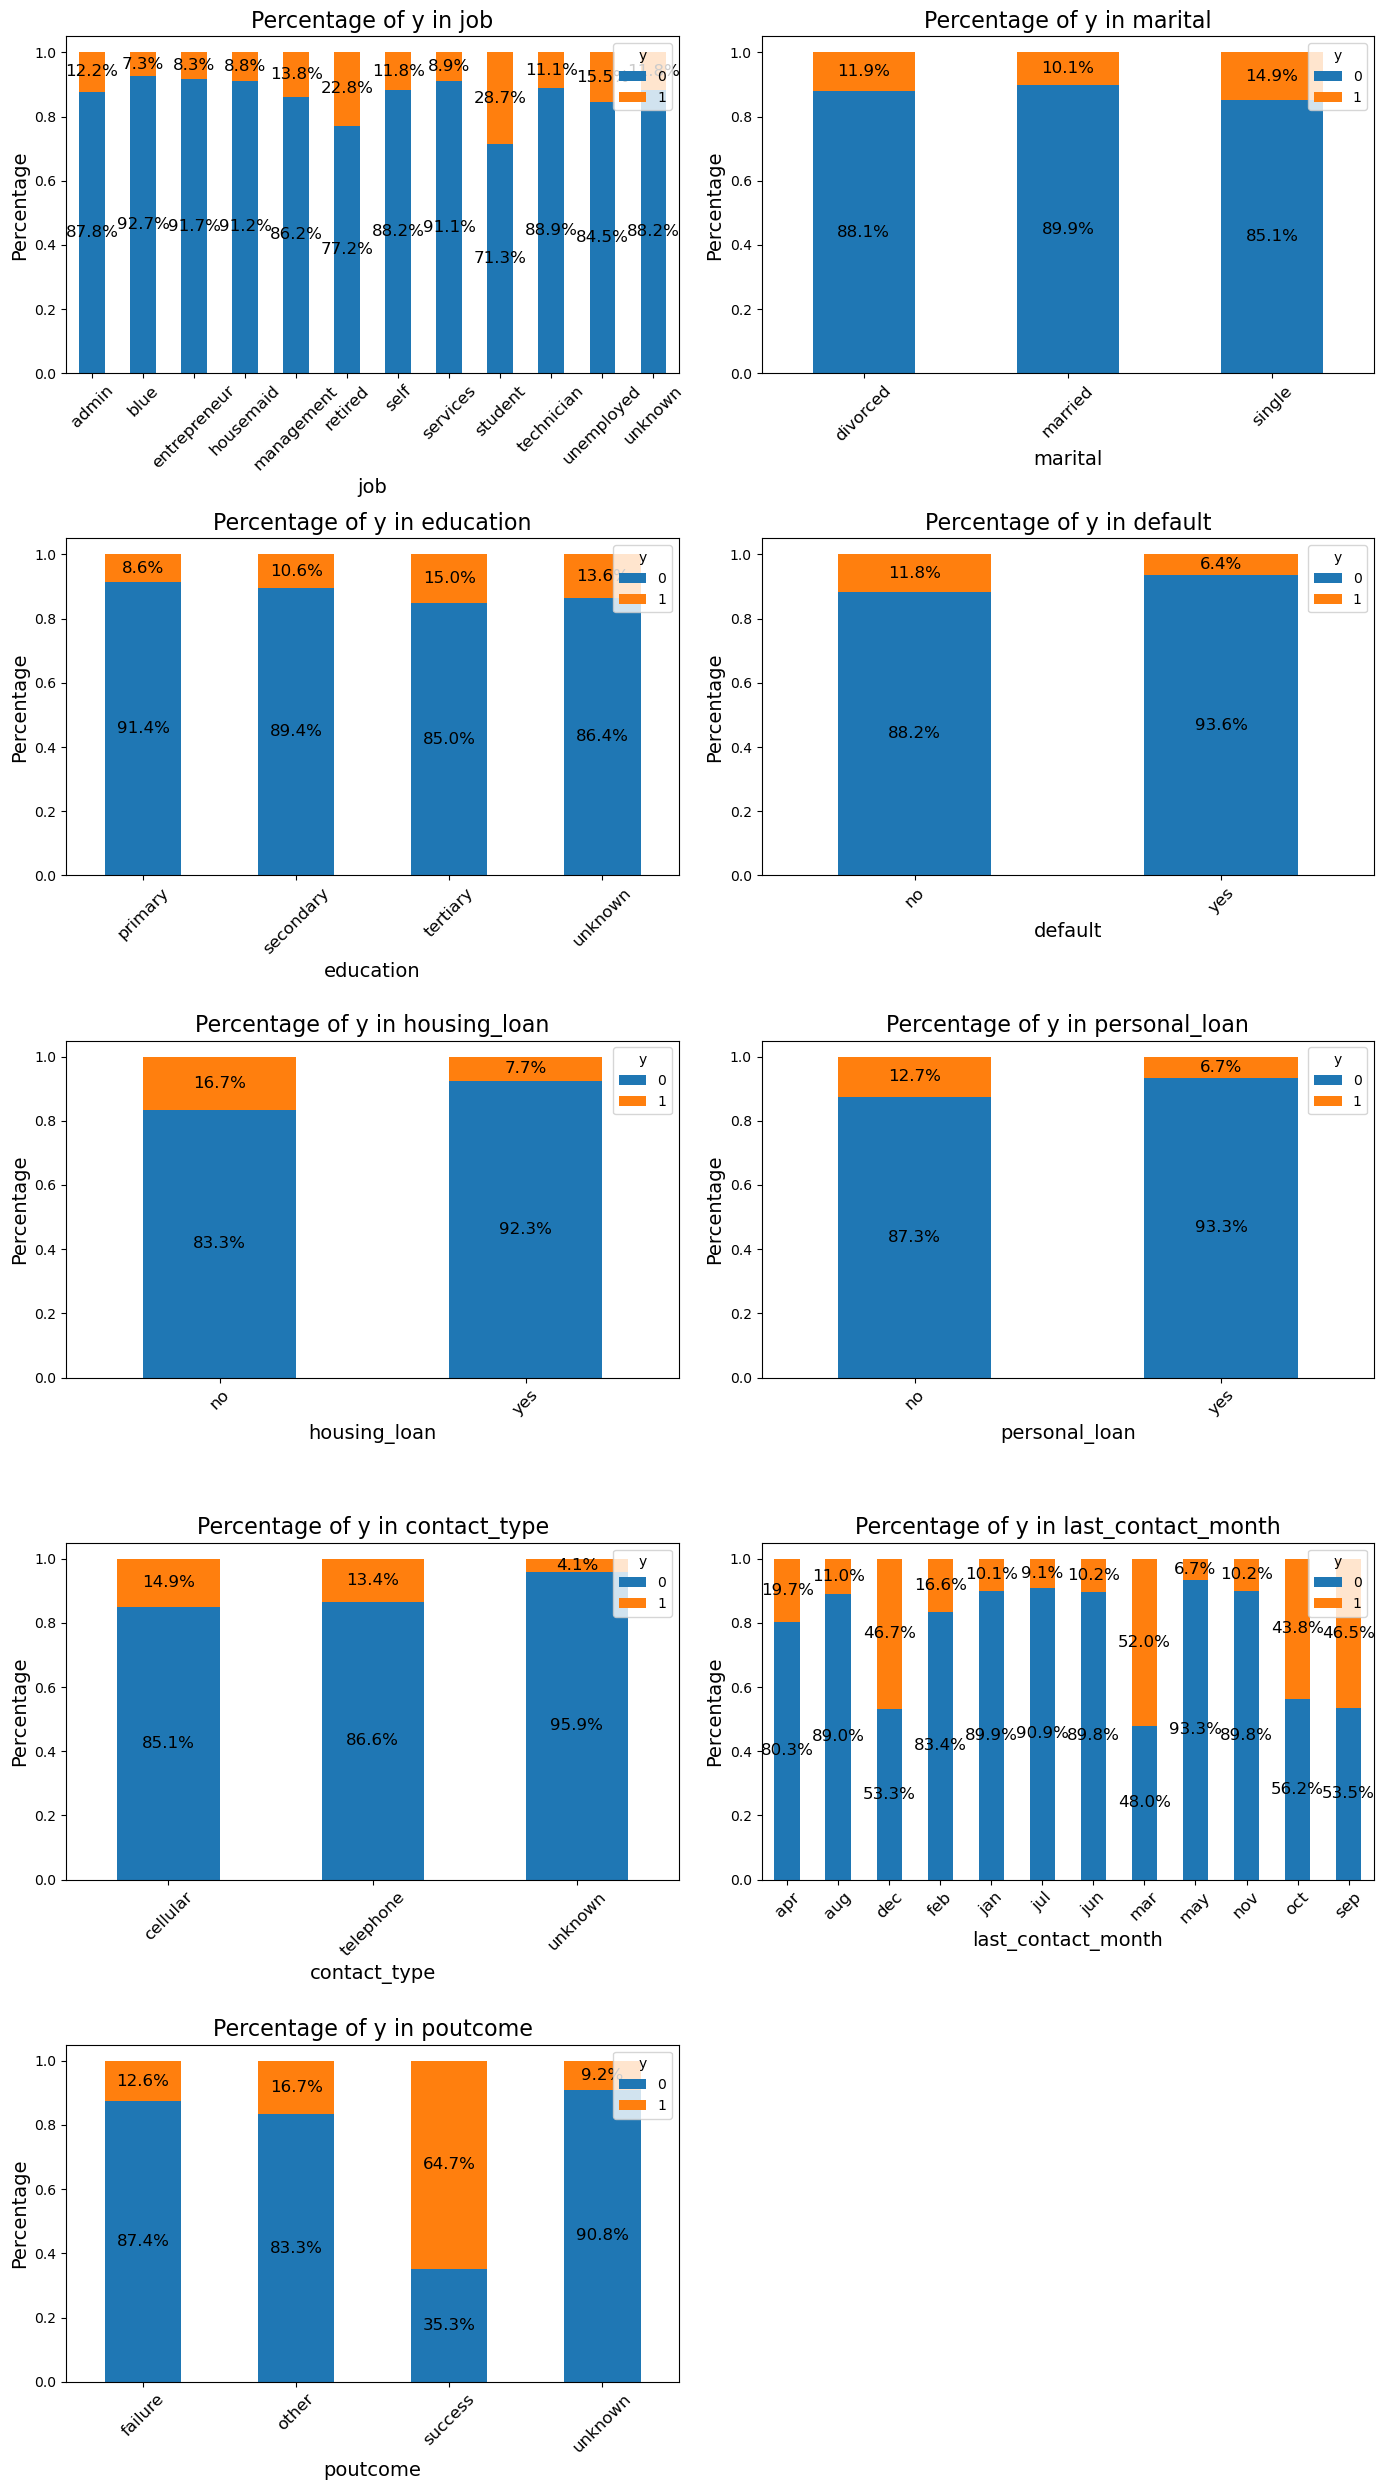

In [12]:
# Plot the relationship between categorical variables and subscription rate.

n_cols = 2
n_rows = (len(categorical) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 7, n_rows * 5))
axes = axes.ravel()

for i, col in enumerate(categorical):
    # calculate normalized counts of y for each category
    crosstab = pd.crosstab(df[col], df['y'], normalize='index')
    
    # stacked bar chart
    crosstab.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], ax=axes[i])
    
    # Add percentage label
    add_percentage_labels(axes[i], crosstab)
    
    #
    axes[i].set_title(f'Percentage of y in {col}', fontsize=16)
    axes[i].set_xlabel(col, fontsize=14)
    axes[i].set_ylabel('Percentage', fontsize=14)
    axes[i].tick_params(axis='x', rotation=45, labelsize=12)
    axes[i].legend(title='y', loc='upper right')


fig.delaxes(axes[9])

fig.tight_layout()
plt.show()

Analysis:

1. Job: Retired individuals and students show higher subscription rates, while blue-collar, entrepreneur, housemaid, and service worker have lower rates. Students, being younger and less experienced in investment, often prefer low-risk, low-return products like term deposits. Retired individuals, living on pensions, may prefer stable investment products like term deposits to grow their savings without exposure to high risks. The 'job' might correlate with 'age' , require further analysis to check potential collinearity.

2. Marital: Single clients have higher subscription rates, which makes sense as they are less likely to have children or significant family financial burdens. This makes them having more disposable income for deposit products. This variable might also correlate with loan-related variables, requiring further analysis.

3. Education: Higher education levels correlate with higher subscription rates. This can be explained by the fact that more well-educated individuals tend to have greater awareness of personal financial management. Additionally, higher education levels are often associated with higher income or wealth, making individuals more likely to invest in financial products.

4. Default: Clients with a history of default have lower subscription rates, which aligns with expectations. Peple  have defaulted on loans usually caused by financial difficulties, they are unlikely to have funds available for deposits or investments. However, the small proportion of default = yes  makes this variable less likely to have a significant impact on log-odds of y=1.

5. Loan: Both housing loans (mortgages) and personal loans are related with lower subscription rates. This make sense, asindividuals with loan obligations have less spare money for deposit products

6. last_contact_month: While most clients were last contacted in May, the subscription rate during May is low. This could be explained by the fact that May, along with June, July, and August, likely saw the most significant marketing activities in this campaign. Some clients may have subscribed during these months, but those who were undecided were recontacted in later months(Sep, Oct, Nov, Dec). This persistence led to higher subscription rates in September, October, and December, even though the number of last contacts during those months was relatively low. These clients were likely prospects from earlier months who showed interest but had not yet made a decision. This suggests that the effectiveness of telemarketing is less about the specific month of contact and more about consistent follow-up with interested clients.

7. poutcome: Previous campaign success will significantly increase the probability of success in the current campaign. However, previous failure does not necessarily reduce the likelihood of subscription. Clients who were not previously contacted are less likely to subscribe, highlighting the importance of building and maintaining long-term client relationships through consistent contact.

#### Categorical & Categorical Variable Analysis:

<Axes: xlabel='education', ylabel='job'>

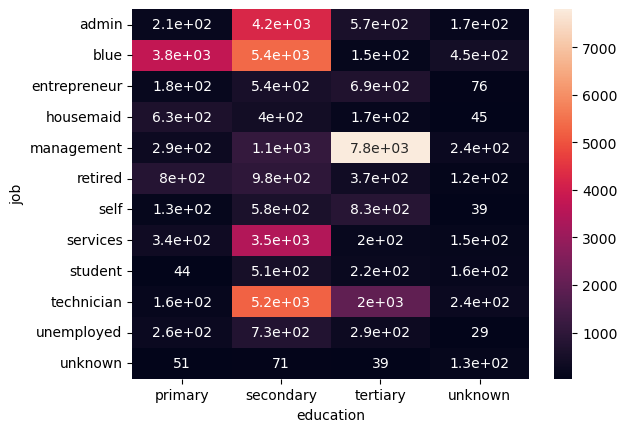

In [13]:
# Job & Eductation
df_job_education = pd.crosstab(df.job, df.education)
sns.heatmap(df_job_education, annot=True)

In [14]:
# Marital & Housing Loan
crosstab = pd.crosstab(df['marital'], df['housing_loan'], normalize='index') * 100
crosstab 

housing_loan,no,yes
marital,,
divorced,44.171308,55.828692
married,43.701771,56.298229
single,46.035966,53.964034


In [15]:
# Marital & Personal Loan
crosstab = pd.crosstab(df['marital'], df['personal_loan'], normalize='index') * 100
crosstab 

personal_loan,no,yes
marital,,
divorced,82.312272,17.687728
married,82.876461,17.123539
single,86.997654,13.002346


#### Categorical Variable Missing Values
There're missing values in the job, education, contact_type and poutcome columns

In [16]:
missing_value_cols = ['job', 'education', 'contact_type', 'poutcome']

for col in missing_value_cols:
    unknown_count = (df[col] == 'unknown').sum()
    total_count = len(df)
    unknown_percentage = round((unknown_count / total_count) * 100, 2)
    
    print(col)
    print(f"Count: {unknown_count}")
    print(f"Percentage: {unknown_percentage}%\n")


job
Count: 288
Percentage: 0.64%

education
Count: 1857
Percentage: 4.11%

contact_type
Count: 13020
Percentage: 28.8%

poutcome
Count: 36959
Percentage: 81.75%



Missing Value Analysis:
1. Job: The unknown values in the job column may arise from completely random missing data, clients choosing not to disclose, or clients with whom the bank has not yet established a close customer relationship.

2. Education: Similar to the job column.

Summary for Job and Education:
The percentage of unknown values in the job and education columns is 0.64% and 4.11%, respectively. From the stacked box plot showing the relationship between job and the target variable (y), approximately 11.8% of the unknown category are term deposit subscribers. This is close to the overall subscription rate in the dataset, suggesting that the unknown values in the job column might be complete random. These values can either be removed or preserved as an unknown category. For education, the unknown category appears to have a small positive impact on y, with 13.6% subscribing. This could be coincidental or indicate a potential relationship between unknown education and other variables. Therefore, it is advisable to preserve the 'unknown' category for education as a separate level for further analysis.

3. Contact Type: Approximately 28.8% of the data has an unknown contact type. Among these, only 4.1% subscribed to the term deposit. This relatively low percentage suggests a negative impact on subscription. Therefore, the unknown contact type should be preserved as a category to analyze its interaction with other variables.

4. Poutcome: Unknown values in the poutcome column likely represent the clients not previously contacted. These values contain specific information and should be preserved. Clients with unknown poutcome values (no prior contact) appear less likely to subscribe, making this information valuable for analysis.

In [17]:
# Drop rows with unknown jobs
df = df[df['job'] != 'unknown']

---

##  2.2 Numerical Variables Analysis

In [18]:
df[numerical].describe()

,age,balance,last_contact_day,last_contact_duration,current_campaign_contacts,pdays,previous_campaign_contacts
count,44923.000000,44923.000000,44923.000000,44923.000000,44923.000000,44923.000000,44923.000000
mean,40.893529,1359.643011,15.813882,258.294838,2.760345,40.321016,0.581996
std,10.604399,3045.091520,8.320040,257.713770,3.092838,100.255146,2.309077
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,447.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1421.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


#### Age

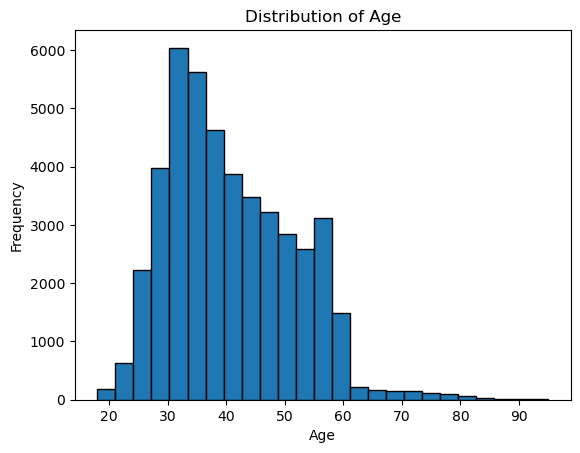

In [19]:
#Distrobution of Age: 
plt.hist(df['age'], bins = 25, edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Clients aged between 25 and 60 form the main target group for this marketing campaign, and most are concentrated between the ages of 30 and 40. The primary working demographic typically ranges from 25 to 60, and clients aged 30–40 are often high-value customers, as they are in the prime phase of their careers and likely earning high annual salaries. Clients younger than 25 are usually students and over 60 are more likely retired. 

Such an age distribution may be influenced by two factors: 
1) The bank's customer pool is naturally distributed this way.
2) It's the marketing strategy of this campaign. Targeting woking age between 25 and 60, specifically between 30 and 40.

#### Age and y

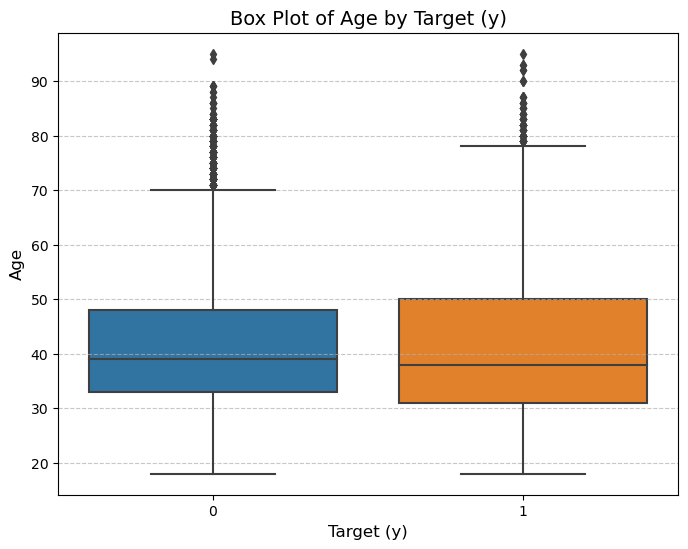

In [20]:
# Box plot between age and y
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='y', y='age')

plt.title('Box Plot of Age by Target (y)', fontsize=14)
plt.xlabel('Target (y)', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


The age range is broader when y=1.

#### Age and Job

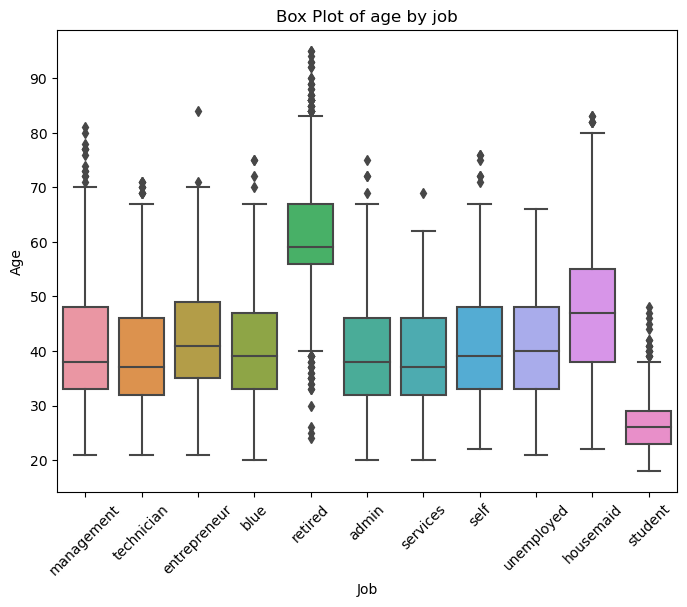

In [21]:
# Box plot between age and job
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='job', y='age')
plt.title('Box Plot of age by job')
plt.xlabel('Job')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

Students are younger, retired people are elder.

#### Age segment and y

In [22]:
def segment_age(age):
    if age <= 25:
        return '<=25'
    elif 25 < age <= 40:
        return '26-40'
    elif 40 < age <= 50:
        return '41-50'
    elif 50 < age <= 60:
        return '51-60'
    else:
        return '>60'
df.loc[:, 'age_segment'] = df['age'].apply(segment_age)

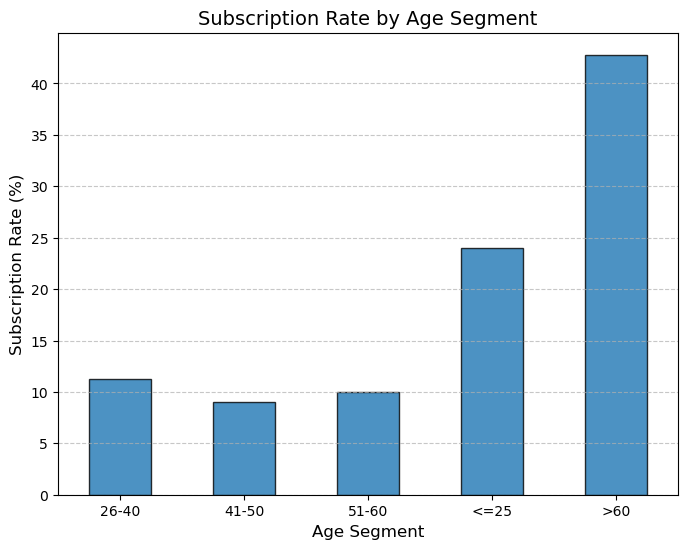

In [23]:
# Relationship between 'age_segment' and y
crosstab = pd.crosstab(df['age_segment'], df['y'], normalize='index') * 100
subscription_rate = crosstab[1]

plt.figure(figsize=(8, 6))
subscription_rate.plot(kind='bar', alpha=0.8, edgecolor='black')

plt.title('Subscription Rate by Age Segment', fontsize=14)
plt.xlabel('Age Segment', fontsize=12)
plt.ylabel('Subscription Rate (%)', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


There is a relationship between job and y, and age segment and y. As age and job are related, one of them should be removed when modeling to avoid multicollinearity.

#### Balance

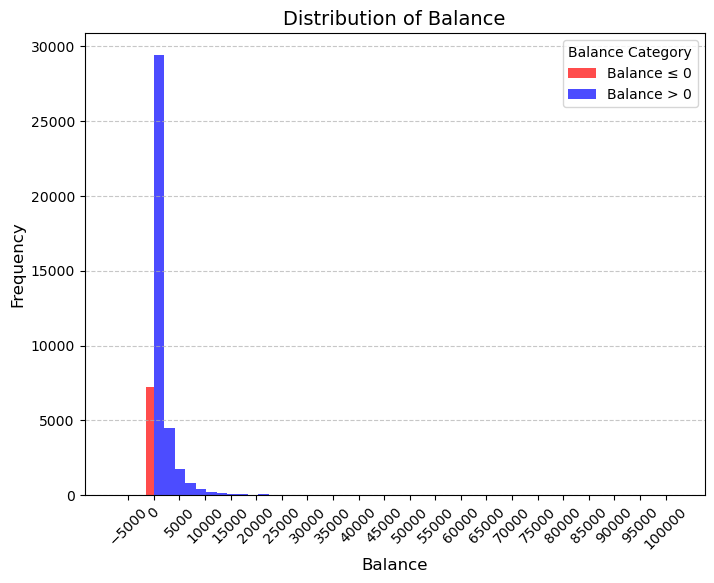

In [24]:
# Distribution of balance, with negative or zero balance colored in red and positive balance in blue.
def categorize_balance(balance):
    if balance <= 0:
        return '≤ 0'
    else:
        return '> 0'

df['balance_category'] = df['balance'].apply(categorize_balance)

plt.figure(figsize=(8, 6))

plt.hist(df[df['balance_category'] == '≤ 0']['balance'], bins=5, color='red', alpha=0.7, label='Balance ≤ 0')
plt.hist(df[df['balance_category'] == '> 0']['balance'], bins=50, color='blue', alpha=0.7, label='Balance > 0')

plt.title('Distribution of Balance', fontsize=14)
plt.xlabel('Balance', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='Balance Category', fontsize=10)

x_ticks = np.arange(-5000, 105000, 5000)
plt.xticks(x_ticks, fontsize=10, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


Balance is highly right-skewed, with most clients in this campaign having a negative yearly average balance or close to 0. This may indicate that they are low-value customers, or not frequent users of the bank’s accounts. Additionally, there are some extremely large values ranging from 15,000 to 100,000.

#### Balance and y

In [25]:
# Create balance segments
def segment_balance(balance):
    if balance < 0:
        return '<0'
    elif 0 <= balance < 100:
        return '0-99'
    elif 100 <= balance < 5000:
        return '100-4999'
    elif 5000 <= balance < 15000:
        return '5000-14999'
    else:
        return '>15000'

df['balance_segment'] = df['balance'].apply(segment_balance)

In [26]:
df['balance_segment'].value_counts()

balance_segment
100-4999      29723
0-99           8615
<0             3762
5000-14999     2477
>15000          346
Name: count, dtype: int64

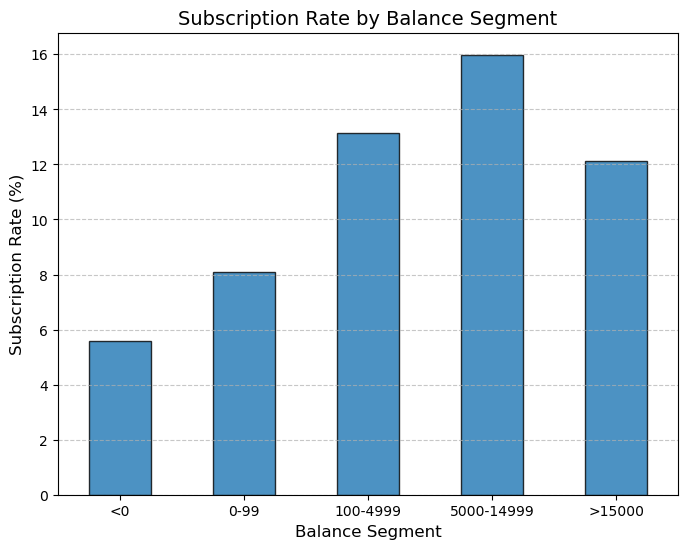

In [27]:
# Relationship between balance segment and y
df['balance_segment'] = pd.Categorical(df['balance_segment'],
                                       categories=['<0', '0-99', '100-4999','5000-14999', '>15000'],
                                       ordered=True)

crosstab = pd.crosstab(df['balance_segment'], df['y'], normalize='index') * 100
subscription_rate = crosstab[1]

plt.figure(figsize=(8, 6))
subscription_rate.plot(kind='bar', alpha=0.8, edgecolor='black')

plt.title('Subscription Rate by Balance Segment', fontsize=14)
plt.xlabel('Balance Segment', fontsize=12)
plt.ylabel('Subscription Rate (%)', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Balance and probability of subscription are related. 

The extreme values introduce noise and may distort the model. They should be treated as outliers and removed.

#### Balance - remove outliers

Define outliers as those with Z-scores > 3 or < -3

In [28]:
# Range of non outliers
balance_mean = df['balance'].mean()
balance_std = df['balance'].std()
non_outlier_range = (balance_mean - 3 * balance_std, balance_mean + 3 * balance_std)
non_outlier_range

(-7775.631548115696, 10494.917570865735)

In [29]:
# Remove outliers
z_scores = (df['balance'] - balance_mean) / balance_std
df = df[(z_scores <= 3) | (z_scores >= -3)]

#### Last Contact Duration

In [30]:
# Convert Last Contact Duration from seconds to minutes
df['last_contact_duration_minute'] = round(df['last_contact_duration']/60, 1)
df[['last_contact_duration','last_contact_duration_minute']]

,last_contact_duration,last_contact_duration_minute
0,261,4.4
1,151,2.5
2,76,1.3
3,92,1.5
5,139,2.3
...,...,...
45206,977,16.3
45207,456,7.6
45208,1127,18.8
45209,508,8.5


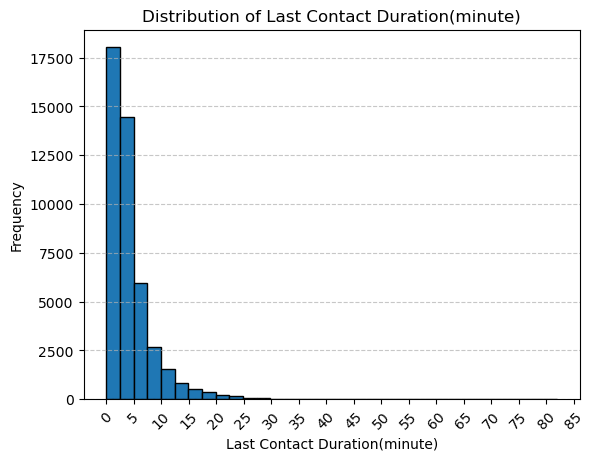

In [31]:
#Distrobution of Duration
plt.hist(df['last_contact_duration_minute'], bins = 33, edgecolor='black')
plt.title('Distribution of Last Contact Duration(minute)')
plt.xlabel('Last Contact Duration(minute)')
plt.ylabel('Frequency')

x_ticks = np.arange(0, 90, 5)
plt.xticks(x_ticks, fontsize=10, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Last contact duration is highly right skewed.

#### Last contact duration and y

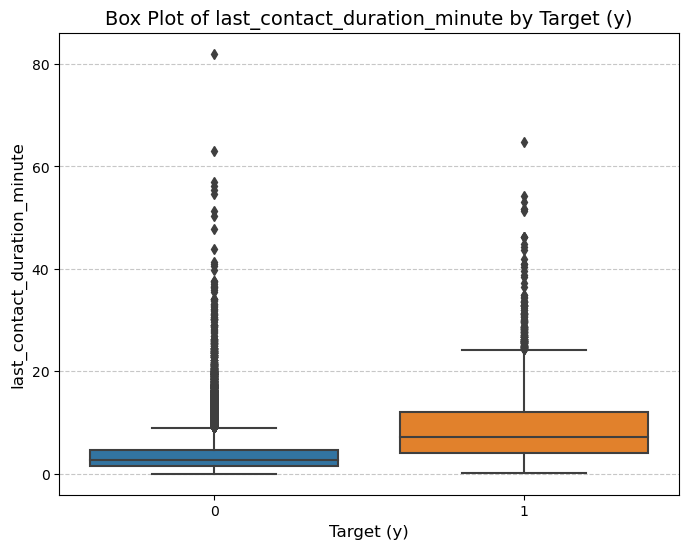

In [32]:
# Box plot between last contact duration and y
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='y', y='last_contact_duration_minute')

plt.title('Box Plot of last_contact_duration_minute by Target (y)', fontsize=14)
plt.xlabel('Target (y)', fontsize=12)
plt.ylabel('last_contact_duration_minute', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

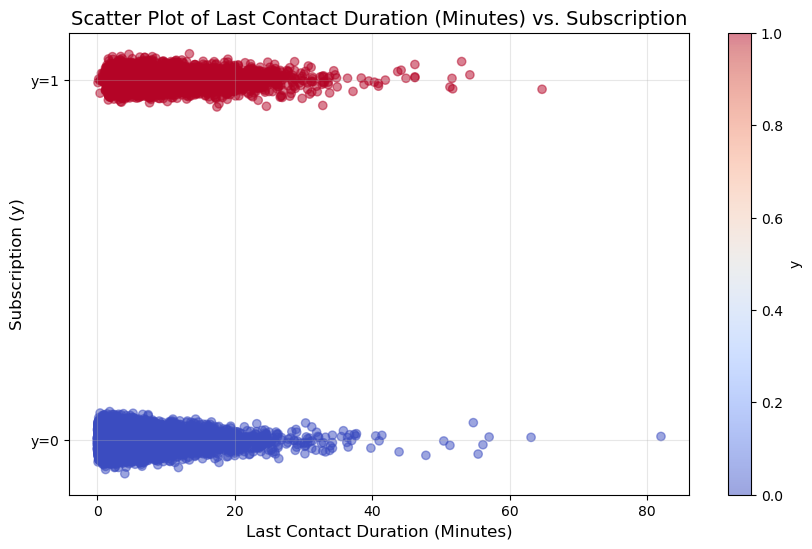

In [33]:
# Scatter plot
df['y_jitter'] = df['y'] + np.random.normal(0, 0.02, len(df))

plt.figure(figsize=(10, 6))
plt.scatter(df['last_contact_duration_minute'], df['y_jitter'], alpha=0.5, c=df['y'], cmap='coolwarm', label='Subscription')
plt.title('Scatter Plot of Last Contact Duration (Minutes) vs. Subscription', fontsize=14)
plt.xlabel('Last Contact Duration (Minutes)', fontsize=12)
plt.ylabel('Subscription (y)', fontsize=12)
plt.yticks([0, 1], ['y=0', 'y=1'])
plt.colorbar(label="y")
plt.grid(alpha=0.3)
plt.show()


The data in the right tail reflect valid observations, they are real, not errors. These values provide important information about the relationship between the variable and the target (y) and should not be treated as outliers. However, the very extreme values (e.g., >30) introduce noise, so a ceiling of 30 can be applied.

In [34]:
df = df[df['last_contact_duration_minute'] < 30].copy()

#### current_campaign_contacts

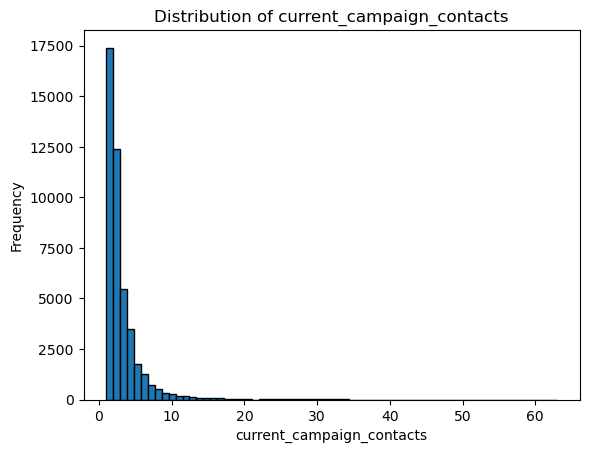

In [35]:
#Distribution of number of contact in this campaign:
plt.hist(df['current_campaign_contacts'], bins = 65, edgecolor='black')
plt.title('Distribution of current_campaign_contacts')
plt.xlabel('current_campaign_contacts')
plt.ylabel('Frequency')
plt.show()

In [36]:
df[df['current_campaign_contacts'] == 0]

,age,job,marital,education,default,balance,housing_loan,personal_loan,contact_type,last_contact_day,...,current_campaign_contacts,pdays,previous_campaign_contacts,poutcome,y,age_segment,balance_category,balance_segment,last_contact_duration_minute,y_jitter


Current_campaign_contacts is highly right skewed.

#### Current campaign contacts and y

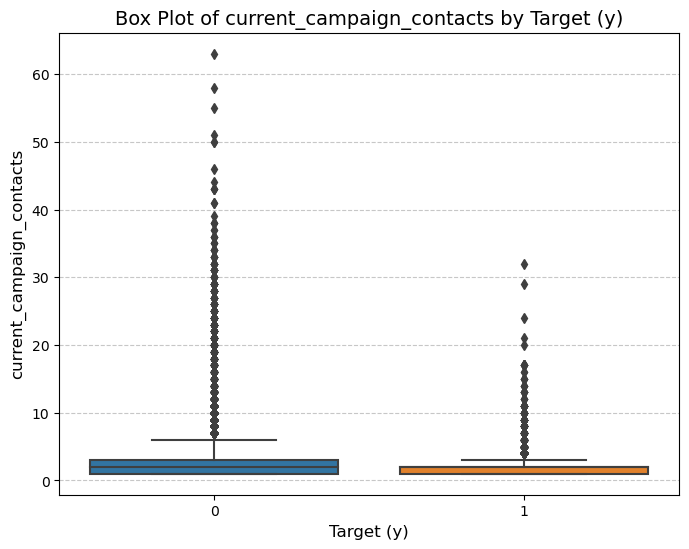

In [37]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='y', y='current_campaign_contacts')

plt.title('Box Plot of current_campaign_contacts by Target (y)', fontsize=14)
plt.xlabel('Target (y)', fontsize=12)
plt.ylabel('current_campaign_contacts', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Subscribers typically have a lower number of current_campaign_contacts. Clients who are highly interested in purchasing usually make a decision after only a few contacts. While clients who are more hesitant may require multiple follow-ups to learn about and consider the product. Despite these efforts, the results are often less favorable, with many of these clients ultimately not subscribing (y=0). As a result, the number of contacts is generally lower for subscribers, while extreme large values are more common among non-subscribers.  

#### previous_campaign_contacts

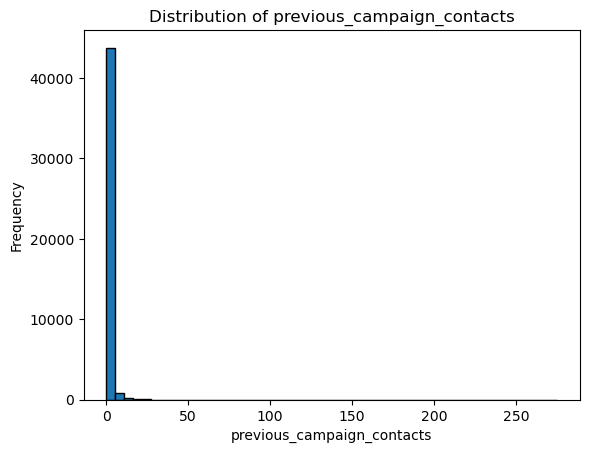

In [38]:
#Distrobution of num contact in Previous campaign
plt.hist(df['previous_campaign_contacts'], bins = 50, edgecolor='black')
plt.title('Distribution of previous_campaign_contacts')
plt.xlabel('previous_campaign_contacts')
plt.ylabel('Frequency')
plt.show()

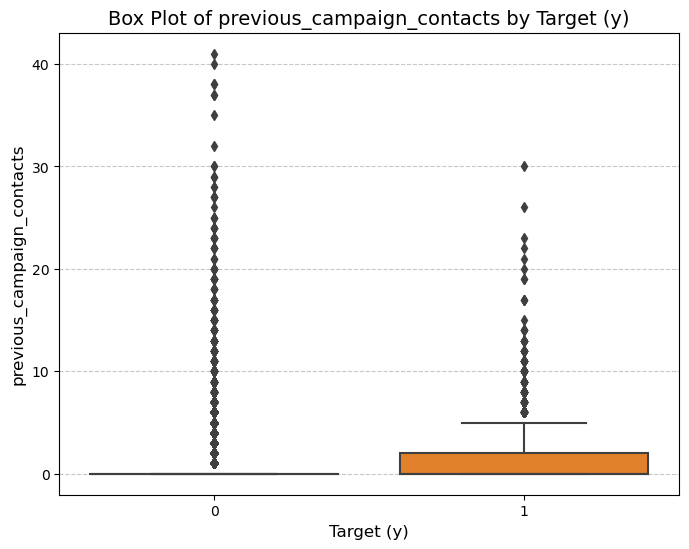

In [39]:
# box plot between previous campaign contacts and y
df1 = df[df['previous_campaign_contacts']<50]

plt.figure(figsize=(8, 6))
sns.boxplot(data=df1, x='y', y='previous_campaign_contacts')

plt.title('Box Plot of previous_campaign_contacts by Target (y)', fontsize=14)
plt.xlabel('Target (y)', fontsize=12)
plt.ylabel('previous_campaign_contacts', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

From observing these two plots, it appears that subscription is related to whether the client was previously contacted, rather than the number of times they were contacted.

#### Converting previous_campaign_contacts to categorical: previously contacted or never contacted 

In [40]:
def categorize_contact(value):
    if value > 0:
        return 1
    else:
        return 0

df['previously_contacted'] = df['previous_campaign_contacts'].apply(categorize_contact)

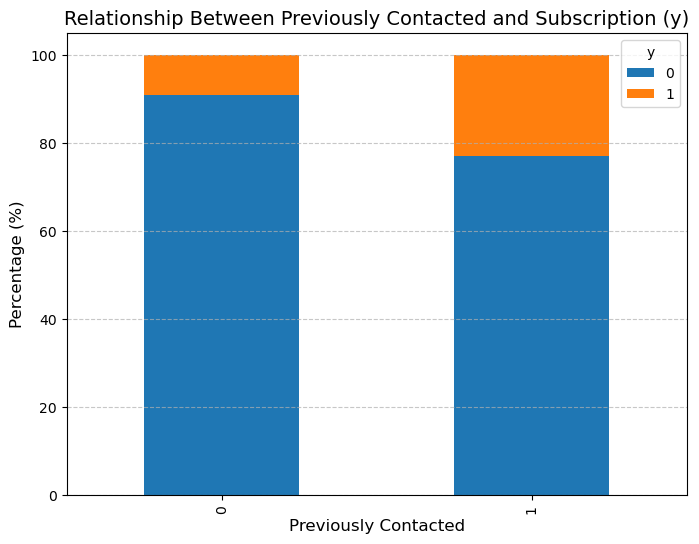

In [41]:
crosstab = pd.crosstab(df['previously_contacted'], df['y'], normalize='index') * 100

crosstab.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], figsize=(8, 6))

# Add titles and labels
plt.title('Relationship Between Previously Contacted and Subscription (y)', fontsize=14)
plt.xlabel('Previously Contacted', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


#### pdays

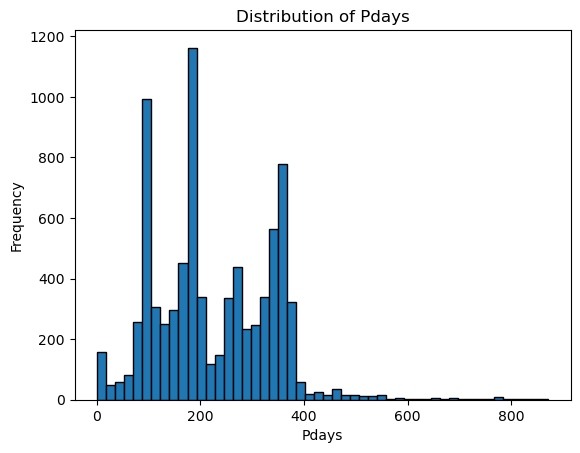

In [42]:
# Distribution of number of days passed by after the client was last contacted from a previous campaign:
# Only plot the distribution for the clients that were previous contacted
filter = (df['pdays'] != -1)
df_filtered = df[filter]
plt.hist(df_filtered['pdays'], bins = 50, edgecolor='black')
plt.title('Distribution of Pdays')
plt.xlabel('Pdays')
plt.ylabel('Frequency')
plt.show()

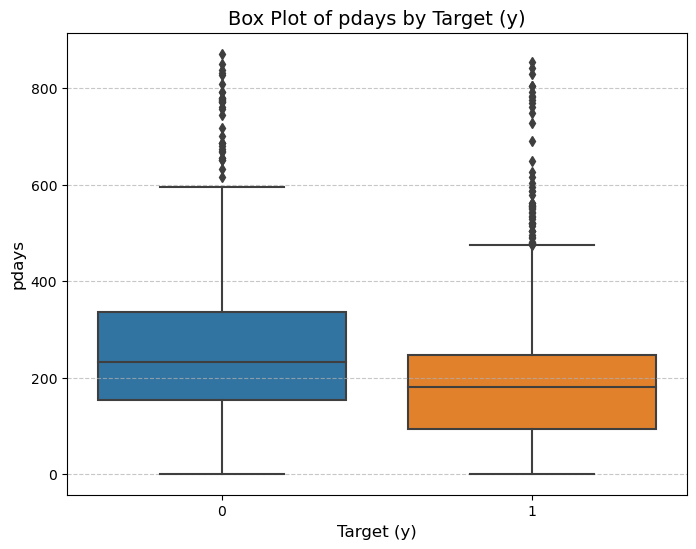

In [43]:
# Box plot between pdays adn y
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_filtered, x='y', y='pdays')

plt.title('Box Plot of pdays by Target (y)', fontsize=14)
plt.xlabel('Target (y)', fontsize=12)
plt.ylabel('pdays', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

For subscribers, the number of days between two campaigns tends to be relatively small.  

We can convert pdays from a numerical variable to a categorical variable, such as "no previous contact," "0-100," "100-200," "200-300," and "300+." This transformation will capture both whether the client was previously contacted and the number of days since the previous campaign. By doing so, we can remove the "previous campaign contacts" variable to reduce redundant information and potential multicollinearity.

In [44]:
# Create pdays segments
def categorize_pdays(value):
    if value == -1:
        return 'no previous contact'
    elif 0 < value <= 100:
        return '1-100'
    elif 100 < value <= 200:
        return '101-200'
    elif 200 < value <= 300:
        return '201-300'
    else:
        return '300+'

df['pdays_segment'] = df['pdays'].apply(categorize_pdays)

In [45]:
df['pdays_segment'].value_counts()

pdays_segment
no previous contact    36604
101-200                 2849
300+                    2461
201-300                 1479
1-100                   1423
Name: count, dtype: int64

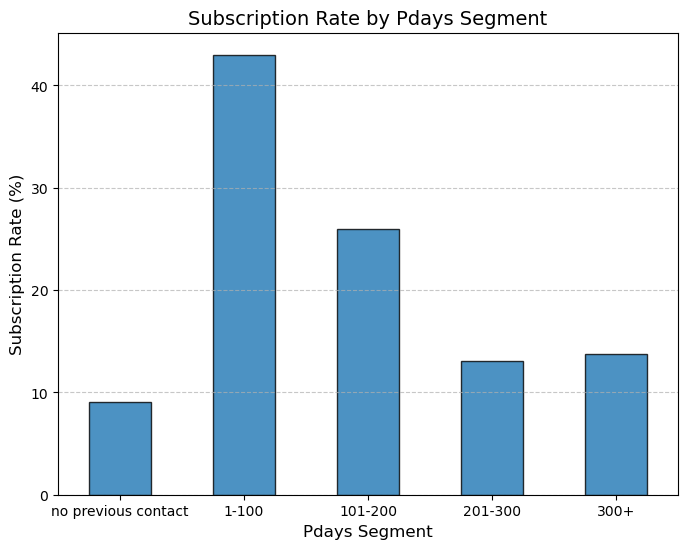

In [46]:
df['pdays_segment'] = pd.Categorical(df['pdays_segment'],
                                       categories=['no previous contact', '1-100', '101-200','201-300', '300+'],
                                       ordered=True)

crosstab = pd.crosstab(df['pdays_segment'], df['y'], normalize='index') * 100
subscription_rate = crosstab[1]

plt.figure(figsize=(8, 6))
subscription_rate.plot(kind='bar', alpha=0.8, edgecolor='black')

plt.title('Subscription Rate by Pdays Segment', fontsize=14)
plt.xlabel('Pdays Segment', fontsize=12)
plt.ylabel('Subscription Rate (%)', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### poutcome

In [47]:
df[df['pdays_segment'] == 'no previous contact'][['poutcome']].value_counts()

poutcome
unknown     36604
Name: count, dtype: int64

In [48]:
df[df['pdays_segment'] != 'no previous contact'][['poutcome']].value_counts()

poutcome
failure     4876
other       1833
success     1498
unknown        5
Name: count, dtype: int64

In [49]:
df[df['poutcome'] == 'unknown'][['pdays_segment']].value_counts()

pdays_segment      
no previous contact    36604
101-200                    2
300+                       2
1-100                      1
201-300                    0
Name: count, dtype: int64

I think there are data entry errors. The definition of 'poutcome' = 'unknown' should indicate no previous contact. All clients who were previously contacted should have a recorded outcome of either failure, success, or other. Ambiguous previous outcomes should be recorded as 'other' in poutcome rather than 'unknown' . Therefore, these five  'unknown' will be reassigned to 'other'

In [50]:
filter_unknown = (df['pdays_segment'] != 'no previous contact') & (df['poutcome'] == 'unknown')
unknown_index = df[filter_unknown].index
df.loc[unknown_index, 'poutcome'] = 'other'

In [51]:
df[df['pdays_segment'] != 'no previous contact'][['poutcome']].value_counts()

poutcome
failure     4876
other       1838
success     1498
Name: count, dtype: int64

#### Create a combined factor from pdays_segment & poutcome to reduce multicollinearity

In [52]:
def combine_pdays_poutcome(row):
    if row['pdays_segment'] == 'no previous contact':
        return 'no previous contact'
    else:
        return f"{row['pdays_segment']}_{row['poutcome']}"

df['interaction_pdays_poutcome'] = df.apply(combine_pdays_poutcome, axis=1)

In [53]:
df['interaction_pdays_poutcome'].value_counts()

interaction_pdays_poutcome
no previous contact    36604
300+_failure            1688
101-200_failure         1657
201-300_failure         1003
101-200_success          660
300+_other               623
1-100_success            575
101-200_other            532
1-100_failure            528
201-300_other            363
1-100_other              320
300+_success             150
201-300_success          113
Name: count, dtype: int64

#### last_contact_day

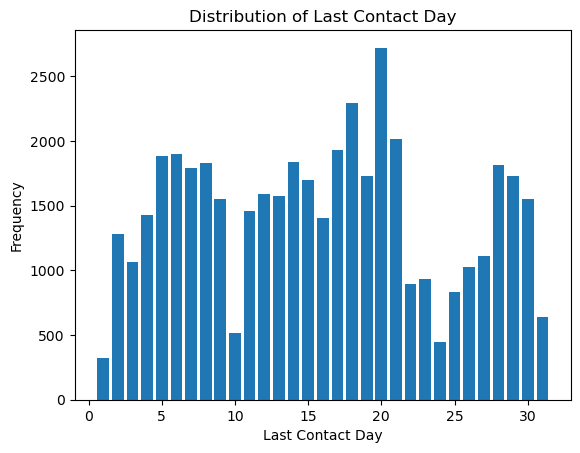

In [54]:
#Distribution of Last Contact Day
counts = df['last_contact_day'].value_counts()
plt.bar(counts.index, counts.values)
plt.title('Distribution of Last Contact Day')
plt.xlabel('Last Contact Day')
plt.ylabel('Frequency')
plt.xticks(size=10)
plt.show()

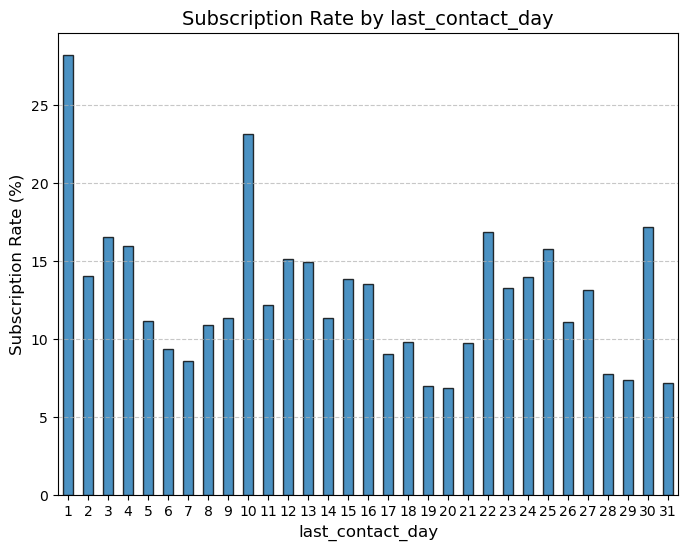

In [55]:
crosstab = pd.crosstab(df['last_contact_day'], df['y'], normalize='index') * 100
subscription_rate = crosstab[1]

plt.figure(figsize=(8, 6))
subscription_rate.plot(kind='bar', alpha=0.8, edgecolor='black')

plt.title('Subscription Rate by last_contact_day', fontsize=14)
plt.xlabel('last_contact_day', fontsize=12)
plt.ylabel('Subscription Rate (%)', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Intuitively, including last_contact_day in the model is not meaningful, as the date of the last contact is unlikely to impact the client’s decision. If this variable is tend to be included, it should be treated as categorical rather than numerical. However, the large number of levels would increase the model’s complexity without providing significant explanatory power. Therefore, this variable will not be included in the model.

---

## 2.3 Summarizing the data cleaning and manipulation during the exploration analysis:

Categorical Variables:
1. job: 0.64% missing values dropped.
2. marital: 
3. education: 4.11% missing values preserved, they may provide meaningful information.
4. default: 
5. housing_loan: 
6. personal_loan: 
7. contact_type: 28.8% missing values preserved. Missing contact types are associated with a lower subscription rate, providing potential insights.
8. last_contact_month: 
9. poutcome: For clients previously contacted but with a previous outcome marked as 'unknown', the value is set to 'other', as prior contact should have a recorded outcome of success, failure, or other, not 'unknown.'

Numerical Variables:
1. age: Dropped to avoid collinearity with job.
2. balance: Outliers defined as |z-score| > 3, removed.
3. last_contact_day: Dropped, as it is unlikely to impact client decisions and would unnecessarily increase model complexity.
4. last_contact_duration_minute: Added a ceiling of 30 to address extreme values.
5. current_campaign_contacts: 
6. pdays_segment: Converted -1 to 'no previous contact' and other pdays values into corresponding categorical ranges.
7. previous_campaign_contacts: Dropped, as its information is redundant with pdays_segment.

---

# 3. Data Preparation For Modeling

### Re-seperate the columns into categorical and numerical variables

In [56]:
Categorical = ['job', 'marital', 'education', 'default', 'housing_loan', 'personal_loan', 
               'contact_type', 'last_contact_month','interaction_pdays_poutcome']
Numerical = ['balance',  'last_contact_duration_minute', 'current_campaign_contacts']
Target = ['y']

### Select relevant variables

In [57]:
relevant_variables = Categorical + Numerical + Target
df = df[relevant_variables]
df.head()

,job,marital,education,default,housing_loan,personal_loan,contact_type,last_contact_month,interaction_pdays_poutcome,balance,last_contact_duration_minute,current_campaign_contacts,y
0,management,married,tertiary,no,yes,no,unknown,may,no previous contact,2143,4.4,1,0
1,technician,single,secondary,no,yes,no,unknown,may,no previous contact,29,2.5,1,0
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,no previous contact,2,1.3,1,0
3,blue,married,unknown,no,yes,no,unknown,may,no previous contact,1506,1.5,1,0
5,management,married,tertiary,no,yes,no,unknown,may,no previous contact,231,2.3,1,0


### Transform categorical variables into dummy variables

In [58]:
multi_categories_col = ['education', 'contact_type', 'last_contact_month']
df = pd.get_dummies(df, columns=multi_categories_col, drop_first=True, dtype=int )

In [59]:
df = pd.get_dummies(df, columns=['interaction_pdays_poutcome', 'job', 'marital'], dtype=int )

In [60]:
df = df.drop(columns = ['interaction_pdays_poutcome_no previous contact', 'job_blue', 'marital_married'])

In [61]:
binary_col = ['default', 'housing_loan', 'personal_loan']
df[binary_col] = df[binary_col].replace({'yes': 1, 'no': 0})
df.head()

,default,housing_loan,personal_loan,balance,last_contact_duration_minute,current_campaign_contacts,y,education_secondary,education_tertiary,education_unknown,...,job_housemaid,job_management,job_retired,job_self,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_single
0,0,1,0,2143,4.4,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,0,1,0,29,2.5,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,1,1,2,1.3,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1506,1.5,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,231,2.3,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [62]:
df.columns.tolist()

['default',
 'housing_loan',
 'personal_loan',
 'balance',
 'last_contact_duration_minute',
 'current_campaign_contacts',
 'y',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'contact_type_telephone',
 'contact_type_unknown',
 'last_contact_month_aug',
 'last_contact_month_dec',
 'last_contact_month_feb',
 'last_contact_month_jan',
 'last_contact_month_jul',
 'last_contact_month_jun',
 'last_contact_month_mar',
 'last_contact_month_may',
 'last_contact_month_nov',
 'last_contact_month_oct',
 'last_contact_month_sep',
 'interaction_pdays_poutcome_1-100_failure',
 'interaction_pdays_poutcome_1-100_other',
 'interaction_pdays_poutcome_1-100_success',
 'interaction_pdays_poutcome_101-200_failure',
 'interaction_pdays_poutcome_101-200_other',
 'interaction_pdays_poutcome_101-200_success',
 'interaction_pdays_poutcome_201-300_failure',
 'interaction_pdays_poutcome_201-300_other',
 'interaction_pdays_poutcome_201-300_success',
 'interaction_pdays_poutcome_300+_failure',

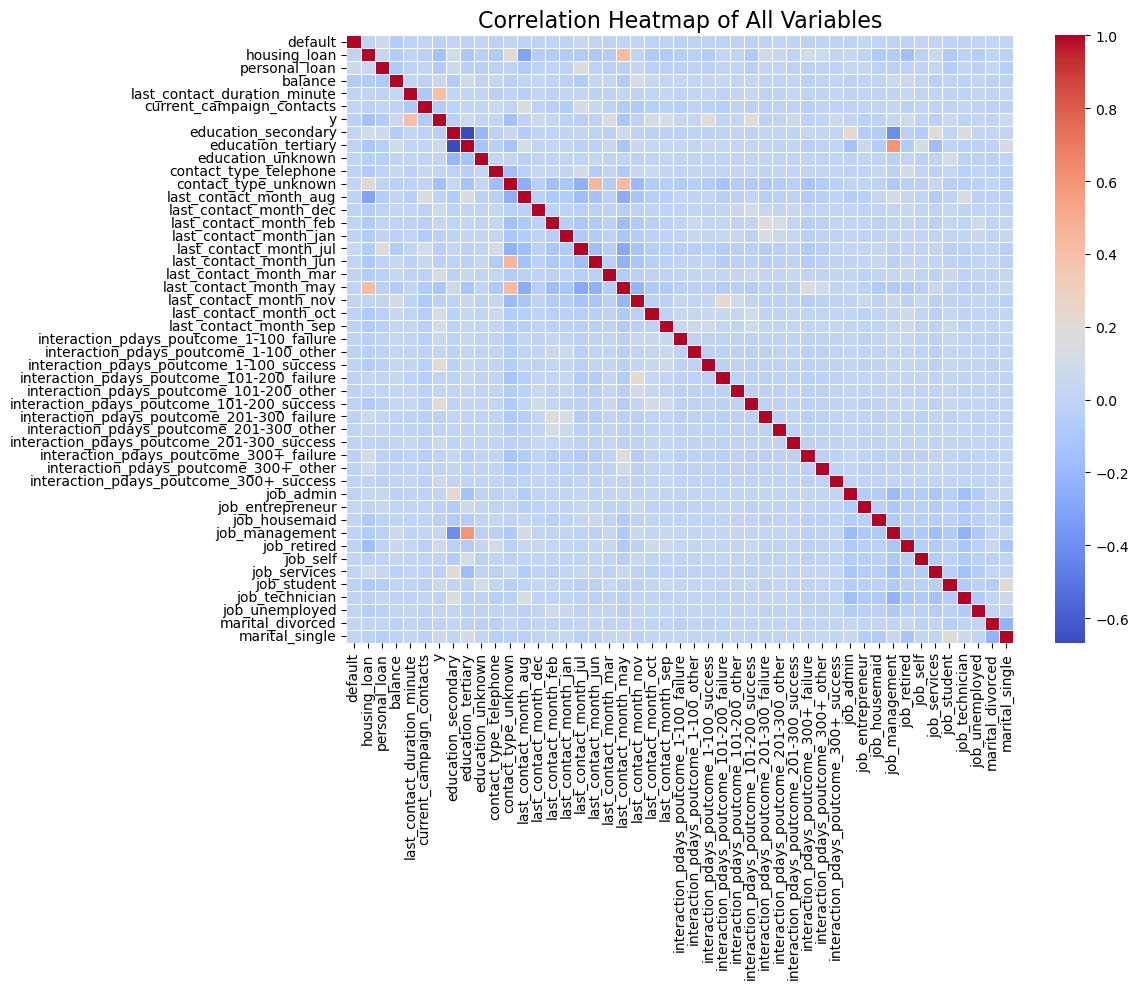

In [63]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=True)

plt.title('Correlation Heatmap of All Variables', fontsize=16)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

### Test&Train Split

In [65]:
from sklearn.model_selection import train_test_split
y = df['y']
X = df.drop(columns=['y'])

# Split the data 
# stratify=y: the class distribution in the target variable remains consistent between the original dataset and the train/test sets after splitting.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Model Training

Since the project is focusing on explanatory modeling instead of predictive modeling, aiming to understand and interpret the relationships between variables and y, 'statsmodel' is chosen instead of 'scikit-learn.'

In [66]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [67]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [68]:
model = sm.Logit(y_train, X_train)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.229844
         Iterations 8


In [69]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                35852
Model:                          Logit   Df Residuals:                    35805
Method:                           MLE   Df Model:                           46
Date:                Fri, 27 Dec 2024   Pseudo R-squ.:                  0.3597
Time:                        19:14:31   Log-Likelihood:                -8240.4
converged:                       True   LL-Null:                       -12869.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -2.9850      0.107    -27.776      0.000      -3.196      -2.774
default                            

# 4. Project Summary

### 4.1 Model Result Summary 

#### When the log odds of y=1 increase or decrease, the probability of y changes accordingly in the same direction.
#### 1. Demographic variables : age, job, marital, education
- Age & Job: Since age and job are correlated, only job was included in the model. Compared to blue-collar workers, administrative roles, students, and retired individuals significantly increase the log odds of term deposit subscription (y=1). Housemaids significantly decrease the log odds of subscription.
- Marital: Compared to married clients, single and divorced clients significantly increase the log odds of y=1. Single clients have a larger positive impact than divorced clients.
- Education: Compared to clients with primary education, secondary and tertiary education significantly increase the log odds of y=1. Tertiary education has a stronger positive impact than secondary education.

#### 2. Financial variables: default, balance, housing_loan, personal_loan

- Default: Default is statistically insignificant due to the small number of clients with a default history. However, in real-world scenarios, a history of default is expected to reduce the probability of term deposit subscription (y=1).

- Balance: Average yearly balance positively impacts the log odds of subscription (y=1), although the effect per unit increase is small.

- Housing Loan (Mortgage) & Personal Loan: Having either a mortgage or a personal loan decreases the log odds of subscription (y=1). Among the two, mortgages have a larger negative impact.

#### 3. Campaign-Related Variables: contact_type, last_contact_day, last_contact_month, last_contact_duration_minute, current_campaign_contacts, previous_campaign_contacts, pdays, poutcome

- contact_type: While knowing the contact type might relate to a higher probability of subscription, it is not an explicit predictor due to the unclear nature of its missing values. Therefore, it is ignored in the analysis.

- last_contact_month: Compared to April, being contacted in March, June, September, October, or December increases the log odds of subscription (y=1). This may indicate cyclical trends, but a more plausible explanation is tied to the campaign strategy. Heavy contact activities in January, February, May, June, July, and August likely lead to a wrap-up phase in March, September, October, and December, where high-potential clients(with no decision been made yet) identified earlier are recontacted. This also explains why the number of contacts in high-subscription months tends to be lower.

- last_contact_duration_minute: Last contact duration has a significant positive impact on the log odds of subscription(y=1). An increase of 1 minute in last contact duration raises the log odds of subscription by 0.2772.

- current_campaign_contacts: The number of contacts in the current campaign negatively correlates with the probability of subscription success. This does not imply that contacting clients more frequently reduces the probability of subscription. Instead, individuals with the willingness and ability to subscribe tend to make decisions within a limited number of contacts. Beyond this threshold, the bank’s attempts to aggressively promote the product may persuade a few clients, but many may feel annoyed, potentially harming long-term customer relationships.

- previous_campaign_contacts, pdays, and poutcome: 1) No Previous Contact: In general, maintaining long-term client relationships is essential. Previous contact, regardless of the outcome, tends to improve the probability of success in future campaigns. 2) Previous Success: A successful previous campaign significantly increases the likelihood of success in the current campaign, regardless of how many days have passed since the last contact. Once a relationship is established, clients are likely to become long-term customers due to their reluctance to change. 3) Previous Failure: For clients whose previous campaign ended in failure, initiating a new campaign within 100 days increases the probability of success compared to clients with no prior contact. However, this positive effect diminishes after 100 days. 4) Ambiguous Previous Outcome: For clients with an ambiguous previous outcome (poutcome = "other"), launching a new campaign within 200 days increases the success rate compared to those with no prior contact.


### 4.2 Recommandations on Bank Marketing Strategy

#### 1. Targeting: Identifying Customer Groups for Marketing Efforts. 
#### Based on the analysis of demographic and financial factors, this term deposit marketing campaign should focus on the following customer groups:

- Retired Individuals and Students: Specifically, target clients aged below 30 or above 60, as they are more likely to be risk-averse compared to other age groups and occupations.

- Single or Divorced Clients: These individuals are often more financially independent, with spare funds available for deposits or investments.

- Well-Educated Clients: Focus on clients with secondary or tertiary education levels, as they are more likely to have an awareness of personal financial management.

- Clients with Positive Yearly Balances: 1)Adquet Positive Balance: These clients have sufficient funds for term deposits and are likely loyal customers of the bank. They are not extremly high balance group, as high balance group is more likely to invest higher risk financial product. 2)Near-Zero Balance: Represents non-frequent users or those with limited investment funds. These clients may require more engagement to convert. 3)Negative Balance: Frequent users but with financial constraints, indicating insufficient funds for investment.

- Clients with Minimal Financial Burdens: Clients with fewer financial obligations, such as housing or personal loans, are more likely to have disposable income available for term deposits.


#### 2. Positioning: 
#### From targeting analysis, we known the characteristics of the client attracted by our current term deposit product. The bank could tailor the current deposit product base on the target customers' needs.

- Highlight the benefit of term deposit - Safety: Comparing to other investment, like security or mutual funds, term deposit offers lower risk. Prospective clients of term deposit focus on safety. For example, retired people and students view safety as a more important factor comparing to return(interest). The product should be tailored to emphasize the low-risk nature of term deposit. 

- Adjustable term and amount: Under the broad defination of term deposit product, the bank should offer several different combination of terms and amount. For students, they may prefer small amount and shorter term; for retired, they may prefer higher amount; for single and divorced client, they may have long term financial goal. Such a product setting covers broader clients.

#### 3. Promotion:
#### Long-term tele-marketing strategies, between campaigns:

1. Customer Relationship Expansion: For prospective clients in the customer pool who have not been contacted before, initiate contact to build a relationship and include them in the next campaign. Historical data shows that previous campaign contact—whether the outcome was success, failure, or ambiguous—significantly increases the likelihood of subscription in future campaigns.

2. Previous Success: Clients who subscribed during a previous campaign are highly likely to subscribe again, regardless of the time passes. To maintain a long-term relationship and maintain loyalty, the bank could promot through offering loyalty rewards, such as higher interest rates, gift incentives, or credit rewards. Additionaly, the bank could simplify the reinvestment process through automatic renewals or user-friendly online options, to make the term deposit product as a consistent investment option with repeat subscriptions easily to be achieved.

3. Previous Failure: Following up within 100 days after a failed campaign increases the probability of success in next campaign. Promotion strategies include time-limited offers (e.g “Act within the next 90 days to secure our exclusive term deposit rate.), customized solutions (address the reasons of the previous failure and tailoring offers to meet client needs.)

4. Ambiguous Previous Outcome ("Other"):For clients with ambiguous previous campaign outcomes, follow up within 200 days, because success rates are higher during this timeframe. Promotion strategies are similar as the ones for previous failure (periodic follow-ups, time-limited promotions, and customized solutions)


#### Short-term, within the campaign:

1. Optimal Number of Contacts: Analysis of last_contact_month shows that previous contacts within the campaign help customers better understand the product, and a certain number of contacts is needed to support decision-making. However, insights from current_campaign_contacts indicate that clients who do not make a decision after a certain number of contacts are more likely to refuse the subscription. The bank should avoid excessive repeat contact to prevent wasting bank resources and annoying clients, focus on meaningful, high-quality interactions rather than  frequency.

2. Increase Contact Duration: A higher last_contact_duration_minute has a positive impact on the likelihood of subscription. During future contact, the customer team should carefully review the client’s background, including demographics and financial history, to better understand their investment needs. Communicate a tailored message that resonates with the client’s goals to bring up interest and engage them in longer, more meaningful conversations. For example, highlight safe, short-term, low-amount, a more flexible term deposit option different from traditional term deposit product for students, that align with their financial situation.

---

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print(vif_data)

                                       feature        VIF
0                                        const  30.037663
1                                      default   1.016756
2                                 housing_loan   1.436828
3                                personal_loan   1.062708
4                                      balance   1.048589
5                 last_contact_duration_minute   1.020322
6                    current_campaign_contacts   1.075017
7                          education_secondary   2.594223
8                           education_tertiary   3.365151
9                            education_unknown   1.271003
10                      contact_type_telephone   1.075563
11                        contact_type_unknown   2.407851
12                      last_contact_month_aug   3.050910
13                      last_contact_month_dec   1.095048
14                      last_contact_month_feb   1.865799
15                      last_contact_month_jan   1.474642
16            